In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('fivethirtyeight')

In [2]:
data_path = "../input/credit-card-customers/BankChurners.csv"

In [3]:
data = pd.read_csv(data_path, index_col='CLIENTNUM').iloc[:, :-2]
data.columns = list(map(lambda col: col.lower(), data.columns)) # easier to work with
data.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  

In [5]:
data.describe()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


the data contains both numeric and categorical columns. missing values don't exist in any columns. however, the range of data differ for which we might need to do feature scaling before model training to not let features with large value dominate features with small values.

In [6]:
attrited = data[data['attrition_flag'] == 'Attrited Customer']

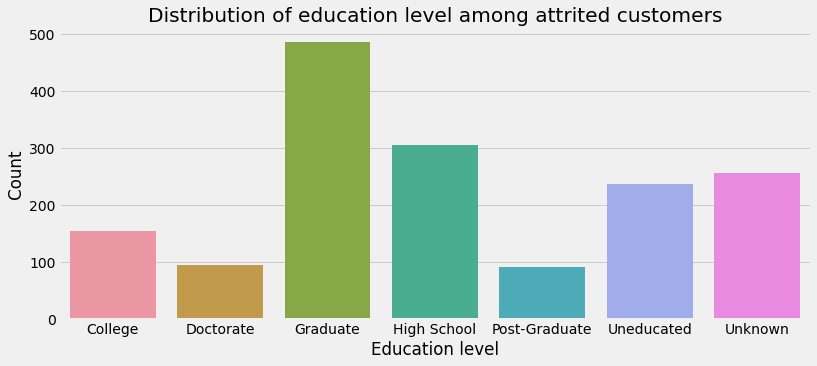

In [7]:
group = attrited.groupby(['education_level'], as_index=False).size()

fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(x='education_level', y='size', data=group)

ax.set_ylabel('Count')
ax.set_xlabel('Education level')
ax.set_title('Distribution of education level among attrited customers')

plt.show()

majority of attrited customers have graduate level followed by high school level education, minority of them have post-graduate or higher degree.

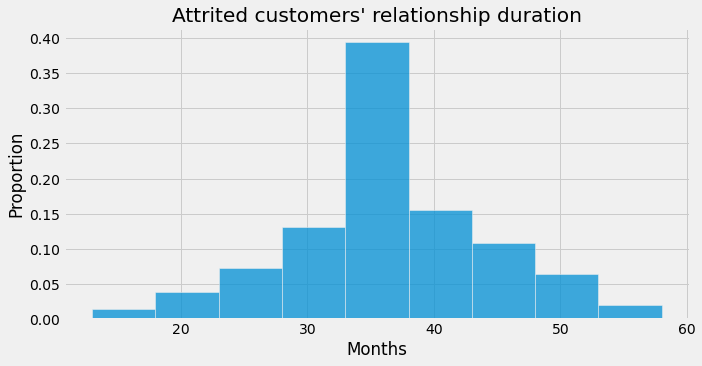

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(attrited['months_on_book'], stat='proportion', binwidth=5)
ax.set_ylabel('Proportion')
ax.set_xlabel('Months')
ax.set_title('Attrited customers\' relationship duration')
plt.show()

from the histogram we could notice that most of the attrited clients have maintained duration of their relationship with bank for around three years

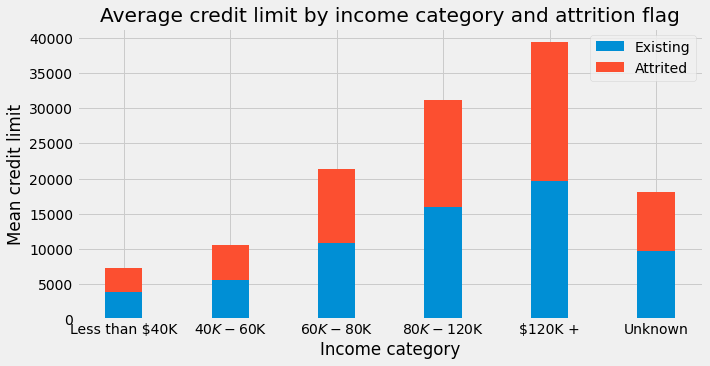

In [9]:
group = data.groupby(['income_category', 'attrition_flag'], as_index=False)['credit_limit'].mean()

labels = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']

key_dict = {v:k for k,v in enumerate(labels)}
sort_key_func = lambda x: x.map(key_dict)

existing = group[group['attrition_flag'] == 'Existing Customer'].sort_values('income_category', key=sort_key_func)['credit_limit']
attri = group[group['attrition_flag'] == 'Attrited Customer'].sort_values('income_category', key=sort_key_func)['credit_limit']

width = 0.35  

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(labels, existing, width, label='Existing')
ax.bar(labels, attri, width, bottom=existing,
       label='Attrited')

ax.set_ylabel('Mean credit limit')
ax.set_xlabel('Income category')
ax.set_title('Average credit limit by income category and attrition flag')
ax.legend()

plt.show()

on average, existing customers in all income categories have higer credit limit than attrited customers except for 120K+ dollars category in which attrited customers have slightly higer average credit limit

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


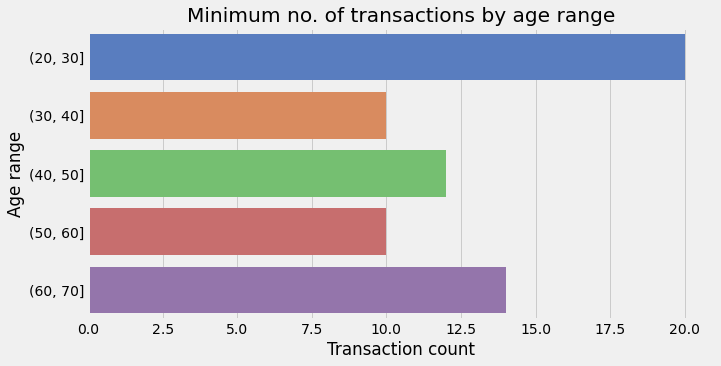

In [10]:
age_data = attrited[['customer_age', 'total_trans_ct']]
age_data['age_range'] = pd.cut(age_data['customer_age'], bins=np.arange(10, 110, 10)).astype(str)
group = age_data.groupby('age_range', as_index=False)['total_trans_ct'].min()
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y='age_range', x='total_trans_ct', data=group, orient='h', palette='muted')
ax.set_ylabel('Age range')
ax.set_xlabel('Transaction count')
ax.set_title('Minimum no. of transactions by age range')
plt.show()

according to the data, in the past year among the attrited customers, a young adult customer has done transactions with the bank not less than 20 times. similarly, elderly customers have second highest minimum no. of transactions done with the bank

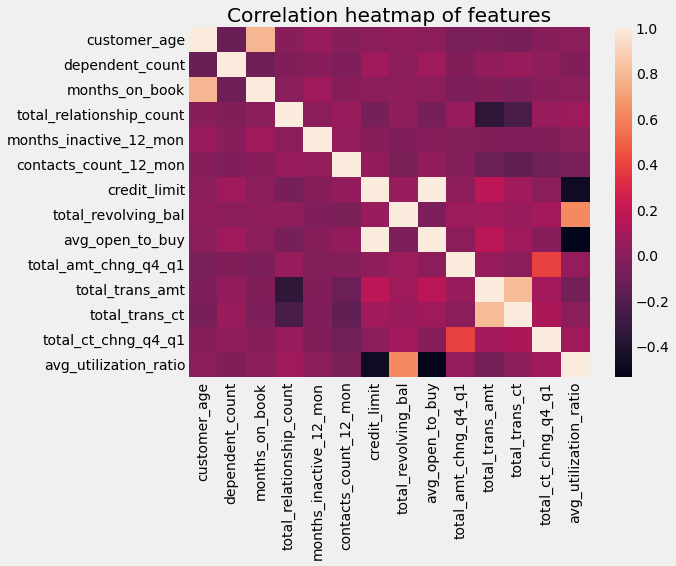

In [11]:
corr = data.corr()
plt.figure(figsize=(8,6))
plt.title('Correlation heatmap of features')
sns.heatmap(corr)
plt.show()

some features are highly to moderately positively correlated, we could consider dropping some of them as no additional information is added by having all of them

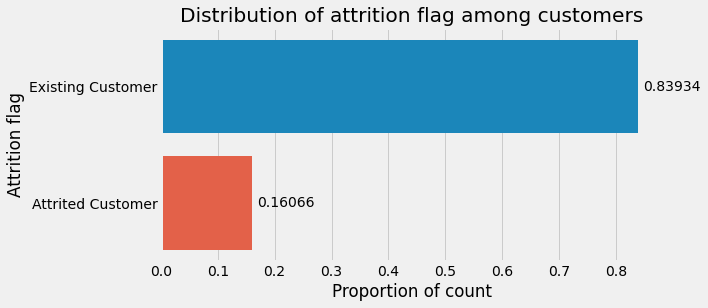

In [12]:
flag_cnt = data['attrition_flag'].value_counts(normalize=True)
plt.figure(figsize=(8,4))
ax = sns.barplot(y=flag_cnt.index, x=flag_cnt, orient='h')
ax.bar_label(ax.containers[0], padding=5)
plt.title('Distribution of attrition flag among customers')
plt.ylabel('Attrition flag')
plt.xlabel('Proportion of count')
plt.show()

in our churn prediction task, the classes of target (attrition flag) are highly imbalanced. In order not to let the class imbalance make model bias towards majority class, we might need to gather more data or synthetically generate data for minority class

In [13]:
cat_feature_index = [1,3,4,5,6]
num_cols = data.select_dtypes(exclude=['object']).columns

X_train_before, X_test, y_train_before, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], random_state=42, stratify= data.iloc[:,0])

In [14]:
smote = SMOTENC(categorical_features=cat_feature_index, random_state=0)
X_train, y_train = smote.fit_resample(X_train_before, y_train_before)

one_hot = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype=np.int16)
train_cat = pd.DataFrame(one_hot.fit_transform(X_train.iloc[:,cat_feature_index]), index=X_train.index)
test_cat = pd.DataFrame(one_hot.transform(X_test.iloc[:,cat_feature_index]), index=X_test.index)

train_X = pd.concat([X_train[num_cols], train_cat], axis=1)
train_X .columns = columns=list(num_cols) + list(one_hot.get_feature_names())

test_X = pd.concat([X_test[num_cols], test_cat], axis=1)
test_X .columns = columns=list(num_cols) + list(one_hot.get_feature_names())

label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(y_train)
test_y = label_encoder.transform(y_test)

In [15]:
def plot_confmat(y_true, y_pred, algo):
    conf_mat = pd.DataFrame(confusion_matrix(y_true, y_pred, normalize='true'), index=label_encoder.classes_, columns=label_encoder.classes_)
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_mat, annot=True, fmt='.3f')
    plt.title('confusion matrix for {} model'.format(algo), fontdict={'size': 16})
    plt.ylabel('true class')
    plt.xlabel('predicted class')
    plt.show()

In [16]:
def plot_feature_importance(model, algo):
    plt.figure(figsize=(8,10))
    imp_df = pd.DataFrame({
        'column': train_X.columns,
        'importance': model.feature_importances_
    })
    sns.barplot(y='column', x='importance', data= imp_df, orient='h', palette='muted')
    plt.title('feature importance for {} model'.format(algo), fontdict={'size': 16})
    plt.show()

              precision    recall  f1-score   support

           0       0.59      0.86      0.70       407
           1       0.97      0.88      0.93      2125

    accuracy                           0.88      2532
   macro avg       0.78      0.87      0.81      2532
weighted avg       0.91      0.88      0.89      2532
 



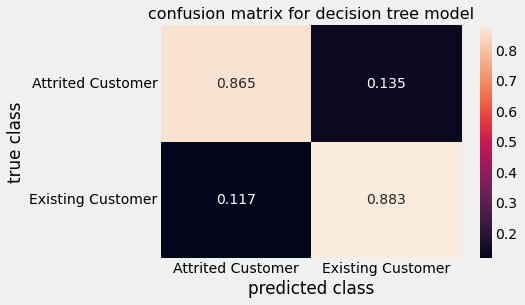

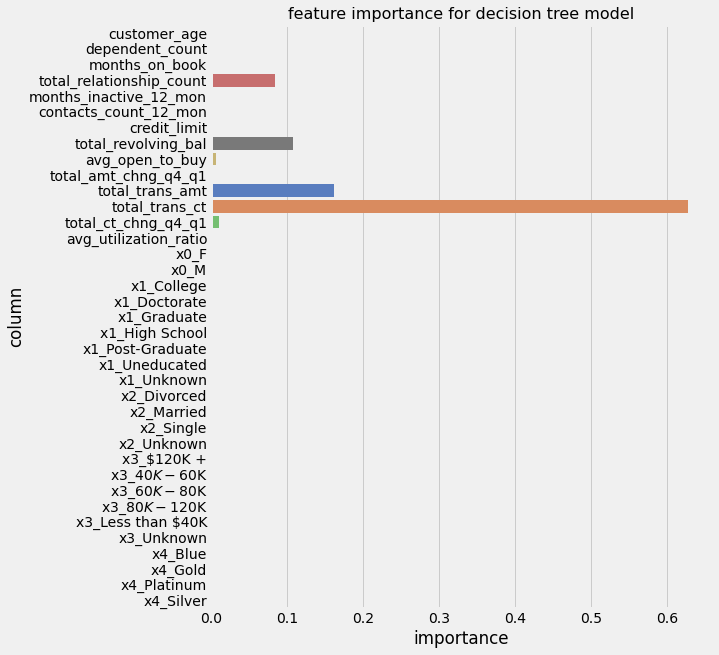

In [17]:
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(train_X, train_y)

pred_dt = dt.predict(test_X)
print(classification_report(test_y, pred_dt),'\n')

plot_confmat(test_y, pred_dt, 'decision tree')

print('\n')
plot_feature_importance(dt, 'decision tree')

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       407
           1       0.98      0.97      0.97      2125

    accuracy                           0.96      2532
   macro avg       0.92      0.92      0.92      2532
weighted avg       0.96      0.96      0.96      2532
 



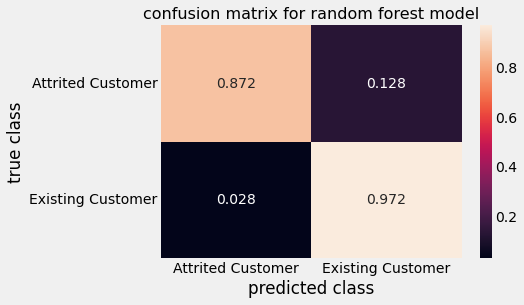

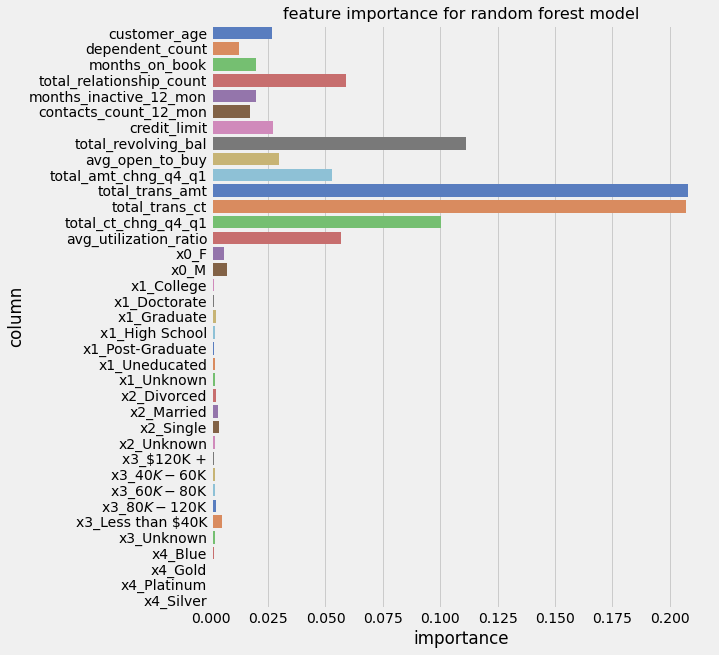

In [18]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_X, train_y)

pred_rf = rf.predict(test_X)
print(classification_report(test_y, pred_rf),'\n')

plot_confmat(test_y, pred_rf, 'random forest')

print('\n')
plot_feature_importance(rf, 'random forest')

random forest model, which combines results from multiple decision trees, has considered more features than a single decision tree model. From the plot, features that have high contribution in seperating churned customers from those who are not churned are transaction related data followed by the debt and relationship count

              precision    recall  f1-score   support

           0       0.51      0.79      0.62       407
           1       0.95      0.85      0.90      2125

    accuracy                           0.84      2532
   macro avg       0.73      0.82      0.76      2532
weighted avg       0.88      0.84      0.86      2532
 



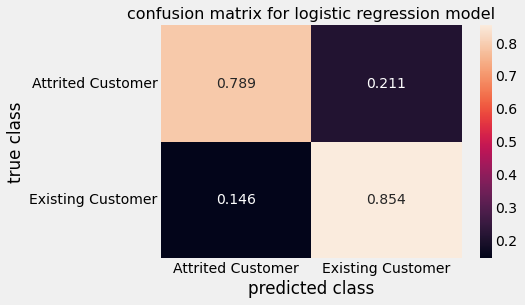

In [19]:
train_X_lr, test_X_lr = train_X.copy(), test_X.copy()

scaler = StandardScaler()
train_X_lr[num_cols] = scaler.fit_transform(train_X_lr[num_cols])
test_X_lr[num_cols] = scaler.transform(test_X_lr[num_cols])

lr = LogisticRegression(random_state=42, max_iter=1e3)
lr.fit(train_X_lr, train_y)

pred_lr = lr.predict(test_X_lr)
print(classification_report(test_y, pred_lr),'\n')

plot_confmat(test_y, pred_lr, 'logistic regression')

              precision    recall  f1-score   support

           0       0.56      0.88      0.68       407
           1       0.97      0.87      0.92      2125

    accuracy                           0.87      2532
   macro avg       0.77      0.87      0.80      2532
weighted avg       0.91      0.87      0.88      2532
 



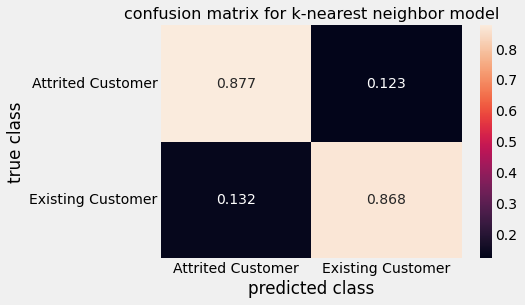

In [20]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(train_X_lr, train_y)

pred_knn = knn.predict(test_X_lr)
print(classification_report(test_y, pred_knn),'\n')

plot_confmat(test_y, pred_knn, 'k-nearest neighbor')

we could apply model from k-nearest neighbor algorithm for our churn prediction task as it can let us miss customers who are propable of churning the least

In [21]:
final = pd.Series(label_encoder.inverse_transform(pred_knn), index=X_test.index)
final.tail(30)

CLIENTNUM
713693958    Attrited Customer
721384308    Existing Customer
718441308    Existing Customer
715304958    Attrited Customer
708295533    Existing Customer
708113208    Attrited Customer
814852533    Existing Customer
716260833    Existing Customer
710581758    Attrited Customer
820047858    Attrited Customer
709178733    Attrited Customer
717277833    Existing Customer
712673283    Existing Customer
715502808    Existing Customer
712507758    Existing Customer
809855808    Existing Customer
709235058    Existing Customer
708496833    Attrited Customer
711843708    Attrited Customer
710952933    Existing Customer
715074258    Attrited Customer
708197358    Existing Customer
708099183    Existing Customer
820925433    Existing Customer
778728783    Existing Customer
814593858    Existing Customer
716403633    Existing Customer
779425608    Existing Customer
712839633    Existing Customer
713363583    Existing Customer
dtype: object